# Naive Bayes

## Write your id numbers and names here


1.   316509397 Rom Amsili
2.   208447029 Matan Leventer


## 1. Classifying Digits
In this part we will test digits classification on the MNIST dataset, using Bernoulli Naive Bayes (a generative model), in contrast to the Multivariate Logistic Regression (a discriminative model) we used before.

The MNIST dataset contains 28x28 grayscale images of handwritten digits between 0 and 9 (10 classes). For mathmatical analysis clarity, and for matching expected API, each image faltten to create a 1D array with 784 elements.

### Loading the MNIST dataset
Load the MNIST data set. The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. Use 
```
mnist = sklearn.datasets.fetch_mldata('MNIST original')
```
to fetch the original data. You may set the `data_home` to where you wish to download your data for caching. Each image is already transformed into a 1D integer array $x\in [0,255]^{784}$, and the corresponding label is an integer $y\in [0,9]$.

Plot a single sample of each digit as the original image, so you get a feeling how the data looks like.

Finally, divide your data into train and test sets, using 1/7 of the data for testing.

---
**Note 1:** Using `digits = sklearn.datasets.load_digits()` will only fetch a very small sample of the original set, with images resized to 8x8. This preprocessing of the data reduces dimensionality and gives invariance to small distortions - however, we will use the original data in this exercise. Feel free to test the proformance of the algorithms below on the preprocessed data as well.

**Note 2:**
Since ML-Data is deprecated, you may wish to use something like this:
>```
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
```

In [152]:
import sklearn.datasets
from sklearn.datasets import fetch_openml
import numpy as np
from keras.datasets import mnist
from matplotlib import pyplot as plt 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix as cm
from sklearn.naive_bayes import BernoulliNB
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns

Sample for each digit :


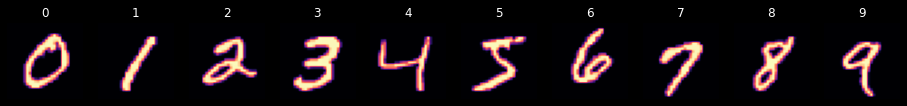

In [153]:
plt.style.use("dark_background") 
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
mnist = sklearn.datasets.load_digits()
sub = []
i=0
while i < 10:
  for j in range(len(y_train)):
    if y_train[j] == i:
      sub.append(x_train[j].reshape(28,28))
      break
  i+=1
print("Sample for each digit :")
plt.figure(figsize=(16,16))
for i in range(10):
  plt.subplot(1,10, i+1)
  plt.imshow(sub[i], cmap='magma')
  plt.title(i)
  plt.axis('off')



### Bernoulli Naive Bayes
If we know how the digits are generated, then we know how to classify them (simply choose the digit class which will maximize the posterior probability) --- but which model should we use for describing the digits generation?

In this part we will try a very simplified model of digits creation (which is obviously not the same as the "real" model), using a Naive Bayes over an underlying Bernoulli distribution --- that is, we will assume that given a digit class, the pixels of the images are the result of independent coin flips, each with its own "head" probability.

Note that since we assume each pixl is either 0 (black) or 1 (white), we will need to adjust (preprocess) our data accrodingly (see below).

So, the model is stated as follows:
$$
\begin{align}
\text{Domain} && x \in \{0,1\}^{784} \\
\text{Prior} && \pi_j = \Pr(y=j) \\
\text{Likelihood} && P_j(x) = \Pr(x | y=j) \\
\end{align}
$$

Where for each $i\in 0\ldots 784$ it holds that
$$
P_{ji}(x_i) = \Pr(x_i | y=j) =
\begin{cases}
p_{ji} & \text{if } x_i=1 \\
1-p_{ji} & \text{if } x_i=0 \\
\end{cases}
$$


#### Question 1
Write the classification rule based on this Naive Bayes model. 
How would you esitmate each of the parameters of the model based on the trainning data? 
Describe in text (preferably math notationns) the classification rule, and explain.

**Bonus:** Think of edge cases which may effect your estimator in an undesired way.

*Answer 1*
              
Bernoulli Rule : P(y|x) = P(x|y) * P(y) / P(x)

---

Classification rule based on Naive Bayes model.

Bernoulli which output 0,1 values:

**Likelihood:** Pj(x) = Pr(x|y=j)= Pji(xi)

**prior:** P(y=j)   -   Sum(images from class j) / Sum(all images)

**Pji** = Sum(ji)/Sum(j)

*j*-  number of examples from class j

*Sum(ji)*- number of examples from class j with pixel x1=1

---

*edge cases*:

Sometimes the training data doesn't contain all cases in it. In those situations some pixels will always be 0 or 1, but in the test databases it will not be the case. For those cases we can use Laplace smoothing.

In addition the multiplications of small values can cause small answers and hard data to work with -> so we can use Log form.

P_xy = log(P_xy)*  x + log(1 - P_xy) * (1 - x)

P_yx = P_xy + log_P_y

#### Question 2
Run a Naive Bayes classifier on the training data and apply predictions on the test data. Use the [sklearn.naive_bayes.BernoulliNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) implementation (see the [source code for sklearn.naive_bayes](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/naive_bayes.py) for details).

Remember we need to preprocess the data in this case such that each pixel would become either black (0) or white (1). For this, use the `binarize` parameter of the implementation. Set this value to $0$ (this is the default), which in this case would mean every pixel with non-zero value will be set to 1.

1. Plot the mean image of each class (estimated $\hat{p}_{ji}$) and generate one sample of each class (remember, you can do this since this is a generative model). You will need to access the `feature_log_prob_` attribute of the trained model.

2. Plot the confusion matrix of your classifier, as claculated on the test data (it is recommended to use [sklearn.metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)). Calculate the total accuracy (fraction of correctly classified images), and summarize the results in your own words.

3. Think of a way you can find the optimal threshold of the binarization part. **There is no need to actually perform this task --- just describe what you would have done.**


#### Answer 2
Put you answer here...

Mean image for each label:


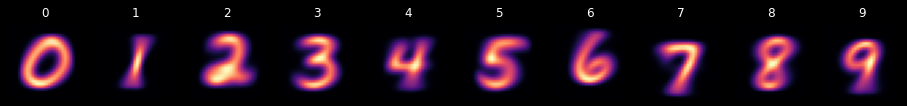

In [154]:
mnist = sklearn.datasets.load_digits()
labels=np.zeros((10, 784))
listoflists=[]
for i in range(10):
  listoflists.append([0])

for i in range(60000):
  labels[y_train[i]]+=x_train[i]
  listoflists[y_train[i]][0]+=1

for i in range(10):
  labels[y_train[i]]=labels[y_train[i]]/(listoflists[y_train[i]][0])

listoflists=np.array([x[0] for x in listoflists])

P_xy = (labels + 1) / (np.array(listoflists) + 1).reshape(10, 1)
# # Plot the mean image of each class  
plt.figure(figsize=(16,16))
print("Mean image for each label:")
for i in range(10):
  plt.subplot(1,10, i+1)
  plt.imshow(P_xy[i].reshape(28,28), cmap='magma')
  plt.title(i)
  plt.axis('off')

In [155]:
snb = BernoulliNB()
snb1 = snb.fit(x_train,y_train)
from_the_model = snb.predict(x_test)
mat  = cm(y_test,from_the_model)

Generating for each label:


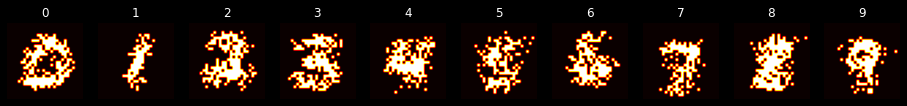

In [156]:
# generating sampel
all = []
for i in range(10):
  zeros = np.zeros([784,])
  randoms = np.random.rand(784,)
  exp_vec = np.exp(snb.feature_log_prob_[i])
  for pix in range(784):
    if exp_vec[pix] > randoms[pix]:
      zeros[pix] = 1
  all.append(zeros)

plt.figure(figsize=(16,16))

print("Generating for each label:")
for i in range(10):
  plt.subplot(1,10, i+1)
  plt.imshow(all[i].reshape(28,28), cmap='hot')
  plt.title(i)
  plt.axis('off')

The accuracy is : 0.8413
Confusion Matrix


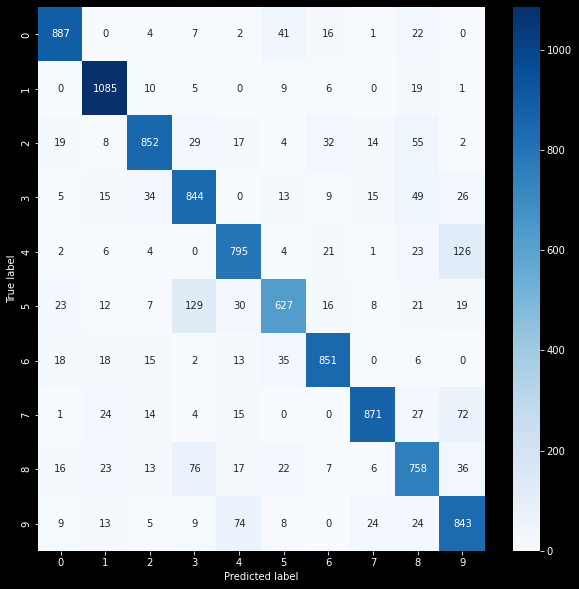

In [157]:
accuracy = np.trace(mat)/y_test.shape[0]
print("The accuracy is :" ,accuracy)
plt.figure(figsize=(10,10))
p = sns.heatmap(mat, annot=True, cmap="Blues", fmt = "d")
plt.ylabel('True label')
plt.xlabel('Predicted label')
print("Confusion Matrix")
plt.show()

**Summarize the results:**

1.The BernoulliNB was able to classify mnist images with 84.13% accuracy for test.

2.The classifier struggled to classify correctly "4" and classified him "9"',inaddtion he struggled to classify correctly "5" and classified him "3",but in the opposite direction he was able to classify correctly.

**Question 3**

Another way that  we can find the optimal threshold of the binarization part is run  Gradient Descent ,
If the value  of the binarization affects the accuracy in a convex fashion.

## 2. Classifing Text Documents using Multinomial Naive Bayes
In this exercise you will classify the "20 newsgroups" data set using your own naive bayes classifier and compare to the scikit learn built in version.

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon messages posted before and after a specific date.

### You task
Implement the barebone class provided: `NaiveBayes(BaseEstimator, ClassifierMixin)` and implement its `fit`, `predict` and `predict_proba` methods.

Then follow next anlysis guidlinnes using the implemented class for train and test classifier:
* Load the **train** data using `from sklearn.datasets import fetch_20newsgroups`. remove headers, footers and quotes (see documentation)
* Use `sklearn.feature_extraction.text import CountVectorizer` to count words (stop_words='english')
* use `sklearn.pipeline.make_pipeline` to chain the vectroizer and model.
* note: limit the vocuabolary size if you suffer memory issues
* compare the accuracy over the **test** data. You can use `accuracy_score, classification_report`
* compare to the built in `sklearn.naive_bayes.MultinomialNB`
* compare to `TfidfVectorizer` preprocessing (you can use the built in model for doing the analysis)
* plot the learning curve - is the model in the bias or variance regime (you can use the built in model for doing the analysis)
* optimize performance in respect to vectorizer hyper parameters (e.g. max_features, max_df etc.).


In [158]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.pipeline import make_pipeline 
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import Binarizer
import pandas as pd
import matplotlib as mat
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


In [159]:
train_data = fetch_20newsgroups(subset='train',remove=('headers', 'footers', 'quotes')) #train data
test_data = fetch_20newsgroups(subset='test',remove=('headers', 'footers', 'quotes'))  #test data

In [160]:
class NaiveBayes(BaseEstimator, ClassifierMixin):
  '''
  BaseEstimator and ClassifierMixin are imported from sklearn.base
  '''
  def __init__(self):
    self.label_prop = {}  #dict of proportional of each label
    self.log_prop_label = {}  #log for each label
    
  def fit(self, x, y):
    #x - train_data.data 
    #y - train_data.target
    x = x.toarray()
    self.count_labels = np.unique(y)
    self.features_num = x.shape[1]
    for label in range(len(self.count_labels)):
      x_l = x[y==label]
      self.label_prop[str(label)] = x_l.shape[0] / x.shape[0]   #P(label)
      self.log_prop_label[str(label)] = np.log(x_l.sum(0) +1 / (x_l.sum(0).sum() + x.shape[1]))      #Laplace correction
      
  def predict_log_proba(self, x):
    x = x.toarray()
    if x.shape[1] != self.features_num:
      raise ValueError("test matrix is not as the same shape of the train matrix!")
    res = np.zeros((x.shape[0],len(self.count_labels)))
    class_doc = {}
    for doc in range(x.shape[0]):
      for label in range(len(self.count_labels)):
        class_doc[label] = self.label_prop[str(label)] + x[doc]*self.log_prop_label[str(label)] -1
        res[doc][label] = sum(class_doc[label])
    return res

  def predict(self, x):
    return np.argmax(self.predict_log_proba(x),axis=1)

In [161]:
model = make_pipeline(CountVectorizer(stop_words='english',max_features=5000), NaiveBayes())
model.fit(train_data.data, train_data.target)
predict_score = model.predict(test_data.data)

In [162]:
acc= metrics.accuracy_score(predict_score,test_data.target)
print("The accuracy is :" ,acc)
classification_report = metrics.classification_report(test_data.target, predict_score, target_names=test_data.target_names, zero_division=0)
print(classification_report)


The accuracy is : 0.4733138608603293
                          precision    recall  f1-score   support

             alt.atheism       1.00      0.01      0.02       319
           comp.graphics       0.62      0.34      0.44       389
 comp.os.ms-windows.misc       0.57      0.16      0.25       394
comp.sys.ibm.pc.hardware       0.54      0.53      0.53       392
   comp.sys.mac.hardware       0.89      0.27      0.41       385
          comp.windows.x       0.42      0.79      0.54       395
            misc.forsale       0.88      0.47      0.61       390
               rec.autos       0.82      0.45      0.58       396
         rec.motorcycles       0.76      0.47      0.58       398
      rec.sport.baseball       0.94      0.47      0.62       397
        rec.sport.hockey       0.44      0.89      0.58       399
               sci.crypt       0.26      0.83      0.40       396
         sci.electronics       0.57      0.20      0.29       393
                 sci.med       0.61   

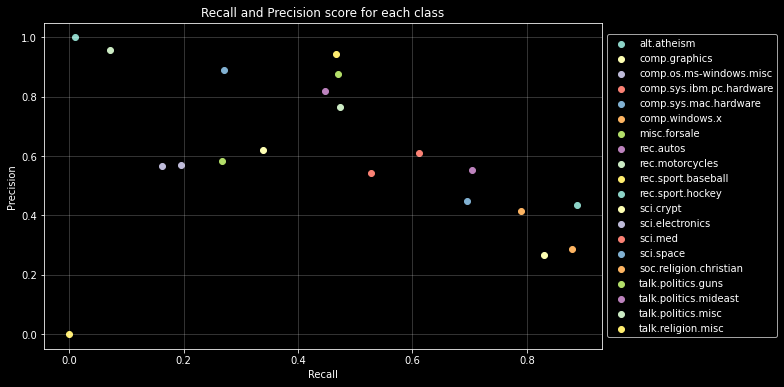

In [163]:
for i in predict_score:
  if type(i) != np.int64 :
    print(type(i))
cr = metrics.classification_report(test_data.target, predict_score, target_names=test_data.target_names,output_dict=True,zero_division=0)
df = pd.DataFrame(cr)
plt.figure(figsize=(10,6))
for g in range(20):
  plt.scatter(df.loc["recall"][g], df.loc["precision"][g])
plt.legend(test_data.target_names,loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Recall and Precision score for each class")
plt.grid(alpha = 0.25)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()


We learn from the graph results that it can be understood that Naive Bayes' recall and accuracy indicators  are not satisfied because we predict from 20 labels is a fine result  with the result and want to improve.

In [164]:
# comparing to MultinomialNB
NBmodel = make_pipeline(CountVectorizer(stop_words='english',max_features=5000), MultinomialNB())
NBmodel.fit(train_data.data, train_data.target)
NB_predict_score = NBmodel.predict(test_data.data)
NB_acc = metrics.accuracy_score(NB_predict_score,test_data.target)
NB_classification_report = metrics.classification_report(test_data.target, NB_predict_score, target_names=test_data.target_names)
print(NB_classification_report)

                          precision    recall  f1-score   support

             alt.atheism       0.40      0.49      0.44       319
           comp.graphics       0.49      0.69      0.57       389
 comp.os.ms-windows.misc       0.50      0.00      0.01       394
comp.sys.ibm.pc.hardware       0.46      0.61      0.53       392
   comp.sys.mac.hardware       0.53      0.64      0.58       385
          comp.windows.x       0.71      0.66      0.69       395
            misc.forsale       0.76      0.73      0.75       390
               rec.autos       0.62      0.69      0.65       396
         rec.motorcycles       0.64      0.73      0.68       398
      rec.sport.baseball       0.72      0.76      0.74       397
        rec.sport.hockey       0.51      0.71      0.60       399
               sci.crypt       0.81      0.63      0.70       396
         sci.electronics       0.58      0.52      0.55       393
                 sci.med       0.74      0.66      0.69       396
         

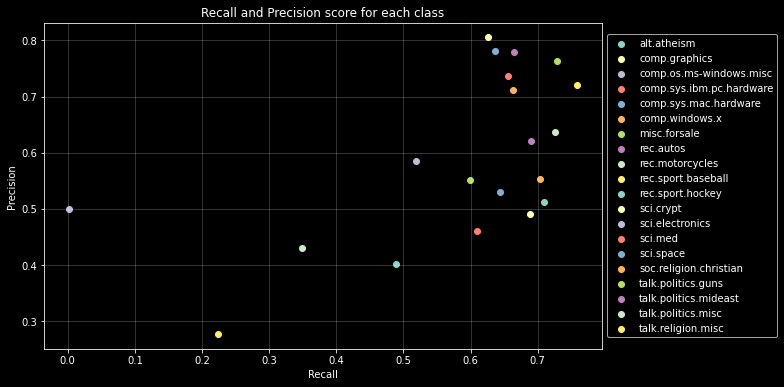

In [165]:
NB_cr = metrics.classification_report(test_data.target, NB_predict_score, target_names=test_data.target_names,output_dict=True)
NB_df = pd.DataFrame(NB_cr)
plt.figure(figsize=(10,6))
for g in range(20):
  plt.scatter(NB_df.loc["recall"][g], NB_df.loc["precision"][g])
plt.legend(test_data.target_names,loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Recall and Precision score for each class")
plt.grid(alpha = 0.25)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

We learn from the results of the graph that it can be understood that the MultinomialNB recall and Precision indicators are better compared to NaiveBayes.

In [166]:
# comparing to tfidf
Tfidifmodel = make_pipeline(TfidfVectorizer(stop_words='english'), MultinomialNB())
Tfidifmodel.fit(train_data.data, train_data.target)
Tfidif_predict_score = Tfidifmodel.predict(test_data.data)
Tfidif_acc = metrics.accuracy_score(Tfidif_predict_score,test_data.target)
Tfidif_classification_report = metrics.classification_report(test_data.target, Tfidif_predict_score, target_names=test_data.target_names)
print(Tfidif_classification_report)

                          precision    recall  f1-score   support

             alt.atheism       0.76      0.18      0.28       319
           comp.graphics       0.67      0.69      0.68       389
 comp.os.ms-windows.misc       0.66      0.58      0.62       394
comp.sys.ibm.pc.hardware       0.60      0.74      0.66       392
   comp.sys.mac.hardware       0.77      0.67      0.71       385
          comp.windows.x       0.81      0.77      0.79       395
            misc.forsale       0.78      0.76      0.77       390
               rec.autos       0.84      0.73      0.78       396
         rec.motorcycles       0.87      0.74      0.80       398
      rec.sport.baseball       0.92      0.80      0.85       397
        rec.sport.hockey       0.57      0.93      0.71       399
               sci.crypt       0.59      0.79      0.67       396
         sci.electronics       0.72      0.52      0.60       393
                 sci.med       0.89      0.76      0.82       396
         

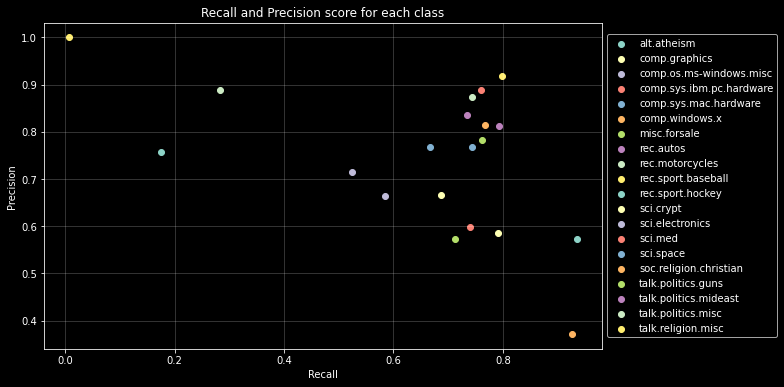

In [167]:
Tfidif_cr = metrics.classification_report(test_data.target, Tfidif_predict_score, target_names=test_data.target_names,output_dict=True)
Tfidif_df = pd.DataFrame(Tfidif_cr)
plt.figure(figsize=(10,6))
for g in range(20):
  plt.scatter(Tfidif_df.loc["recall"][g], Tfidif_df.loc["precision"][g])
plt.legend(test_data.target_names,loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Recall and Precision score for each class")
plt.grid(alpha = 0.25)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

We learn from the results of the graph that it can be understood that the tfidf recall and Precision indicators are better compared to its predecessors.

In [168]:
# plot the learning curve
def plot_learning_curve(estimator, title, x, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim != None:
        plt.ylim(*ylim)
    plt.xlabel("Examples of training")
    plt.ylabel("Rate")
    train_sizes, trs, tes = learning_curve(estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    trsm = np.mean(trs, axis=1)
    trss = np.std(trs, axis=1)
    tesm = np.mean(tes, axis=1)
    tess = np.std(tes, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, trsm - trss, trsm + trss, alpha=0.15, color="b")
    plt.fill_between(train_sizes, tesm - tess, tesm + tess, alpha=0.15, color="g")
    plt.plot(train_sizes, trsm, 'o-', color="b", label="Training rate")
    plt.plot(train_sizes, tesm, 'o-', color="g",label="Cross-validation rate")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

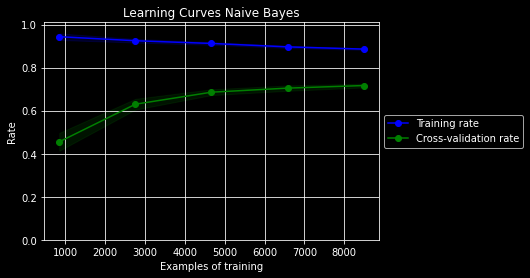

In [169]:
title = "Learning Curves Naive Bayes"
dataset = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'))
x, y = dataset.data, dataset.target
cv = ShuffleSplit(n_splits=12, test_size=0.25, random_state=0)
plot_learning_curve( make_pipeline(TfidfVectorizer(stop_words='english'), MultinomialNB()), title, x, y, ylim=(0, 1.01), cv=cv, n_jobs=4)

From the graph above, we can learn that  There are opposite trends ,the cross-validation rate is very low at the beginning and increases and the training rate is very high at the beginning and decreases. These results are expected due to the small number of samples at the beginning (the model is biased) and then after adding more examples we can see that the model stabled and the variance of the model increases.


### Bonus I (5 points)
#### Model interpretability
Find the most important features for a **specific** decision of a NB classifier.
Because the model has learned the prior $p(x_i|c)$ during the training, the contribution of an individual feature value can be easily measured by the posterior, $p(c|x_i)=p(c)p(x_i|c)/p(x_i)$
Implement a function which gets a scikit-learn NB model as input and returns $P(c|x_i)$:

`def calc_p_c_given_xi(model)`

Hint: Use the following model properties:

* `model.class_log_prior_`
* `model.feature_log_prob_`

Note: remember these are logs and you need to use np.exp and normalize to get $P(c|x_i)$ 
Another hint: use numpy built-in broadcasting property.

* Use the interpretation to examine errors of the classifier where $\hat{c}\ne c$. Which top words support the correct class and which support the wrong class? You can use the `print_txt` below to color words.

In [170]:
import string
def print_txt(txt, hot, cold):
  """
  print the text, coloring hot and cold words with colors
  """
  cold_color='\x1b[41;37m{}\x1b[0m'
  hot_color='\x1b[42;37m{}\x1b[0m'
  def color(token):
    lower = str(token).lower()
    lower = lower.replace('\t','').replace('\n','')
    lower = lower.translate(string.punctuation)
    if (lower in hot) and (lower in cold):
      return mid_color.format(token)
    elif lower in hot:
      return hot_color.format(token)
    elif lower in cold:
      return cold_color.format(token)
    else:
      return token
  colored_txt = " ".join([color(token) for token in txt.split(' ')])
  print(colored_txt)
print_txt('This word support the first class but this the other', ['word'],['other'])

This word support the first class but this the other


In [171]:
# Implementationn for 1st bonus
def p_c_given_xi(model):
  p_l = np.exp(model.class_log_prior_)  #P(c)
  p_w_c = np.exp(model.feature_log_prob_)  #P(xi|c)
  p_c_w = p_l.reshape(-1,1)* p_w_c
  p_c_w = p_c_w/p_c_w.sum(axis=0) #P(c|xi)
  return p_c_w  

Cvectorizer = CountVectorizer(stop_words='english')
model = MultinomialNB()
pipeline = make_pipeline(Cvectorizer, model)
pipeline.fit(train_data.data,train_data.target)
pred = pipeline.predict(test_data.data)
p_c_w=p_c_given_xi(model)

In [172]:
x = Cvectorizer.transform(test_data.data)
idx2word={v:k for k, v in Cvectorizer.vocabulary_.items()}
cold_color='red'
hot_color='green'
def hot_and_cold(c, word_index, min_p=0.001, max_n=10):
  word_score = p_c_w[c, word_index]
  words =[idx2word[w] for w in word_index]
  s = pd.Series(word_score.flatten(), index=[words, word_index])
  s.index.names=['word','idx']
  s.name = 'score'
  stop = s.sort_values(ascending=False)
  stop = stop[stop>min_p]
  if len(stop)>max_n:
    stop = stop[:max_n]
  return stop.reset_index()

In [173]:
def display_doc(i):
  """
  displaying document i
  """
  c_hat = pred[i]
  c = test_data.target[i]
  txt = test_data.data[i]
  xi = x[i,:]
  nz = xi.nonzero()[1] 
  hot = hot_and_cold(c,nz)
  print("Hot words :")
  print(hot)
  hot_words = hot.word.tolist()
  if c_hat!=c:
    cold = hot_and_cold(c_hat,nz)
    cold_words = cold.word.tolist()
    print("-"*30)
    print("Cold words :")
    print(cold)
  else:
    cold_words = []
  print_txt(txt, hot_words, cold_words)

In [174]:
display_doc(49)

Hot words
        word    idx     score
0     claims  27642  0.150631
1      claim  27638  0.138678
2      shown  82216  0.119297
3       hold  46950  0.091778
4     people  70436  0.082286
5    justice  52862  0.082148
6     things  88484  0.076413
7      given  43387  0.073885
8  different  33540  0.068060
9       read  76207  0.066774
------------------------------
Cold words
      word    idx     score
0      nsa  66562  0.901768
1  clipper  27867  0.898376
2   crypto  30680  0.868209
3    crypt  30670  0.821201
4  wiretap  96579  0.793758
5   secure  81173  0.790251
6     keys  53849  0.733113
7     nist  65877  0.722142
8   phones  70995  0.688921
9       s2  79691  0.582884

The CLIPPER initiative is an announcement by Clinton that all the 
"secure" voice phones will use the same crypto chip, as a de-facto
government standard.  Problem is, the government is admitting that
they hold the keys to break the code easily, and the Justice department
will be using the keys to listen in 

### Bonus II (5 points)
#### How can you correct the analyzed error?

To read more about model interpretation, see the blogpost below and the tutorial:
* https://lilianweng.github.io/lil-log/2017/08/01/how-to-explain-the-prediction-of-a-machine-learning-model.html
* https://github.com/chanansh/right_but_why

Answer for 2nd bonus